In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
HDNames = ['Cement','BFS','FLA','Water','SP','CA','FA','Age','CCS']
rdata = pd.read_excel('ConcreteData.xlsx' , names = HDNames)
rdata.head()

,Cement,BFS,FLA,Water,SP,CA,FA,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847


In [7]:
# Some exploratory data analysis
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cement  1029 non-null   float64
 1   BFS     1029 non-null   float64
 2   FLA     1029 non-null   float64
 3   Water   1029 non-null   float64
 4   SP      1029 non-null   float64
 5   CA      1029 non-null   float64
 6   FA      1029 non-null   float64
 7   Age     1029 non-null   int64  
 8   CCS     1029 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### the target of our concrete compressive strength (CCS)

In [5]:
rdata.describe()

,Cement,BFS,FLA,Water,SP,CA,FA,Age,CCS
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,280.914091,73.967298,54.239796,181.585374,6.206710,972.853401,773.673712,45.679300,35.774912
std,104.245542,86.290255,64.005258,21.357226,5.975279,77.763459,80.156602,63.198226,16.656880
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,732.600000,7.000000,23.696601
50%,272.800000,22.000000,0.000000,185.000000,6.350000,968.000000,779.700000,28.000000,34.397958
75%,350.000000,143.000000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,45.939786
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


<AxesSubplot:>

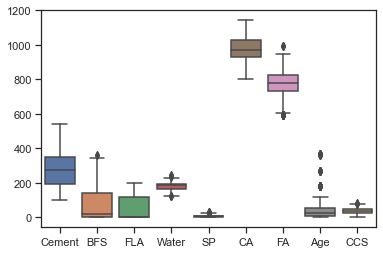

In [9]:
# let's visualize the distribution of each feature
sns.set(style="ticks") 
sns.boxplot(data = rdata)

### we can see easily that the distribution is not good at all, we have to scale our data!

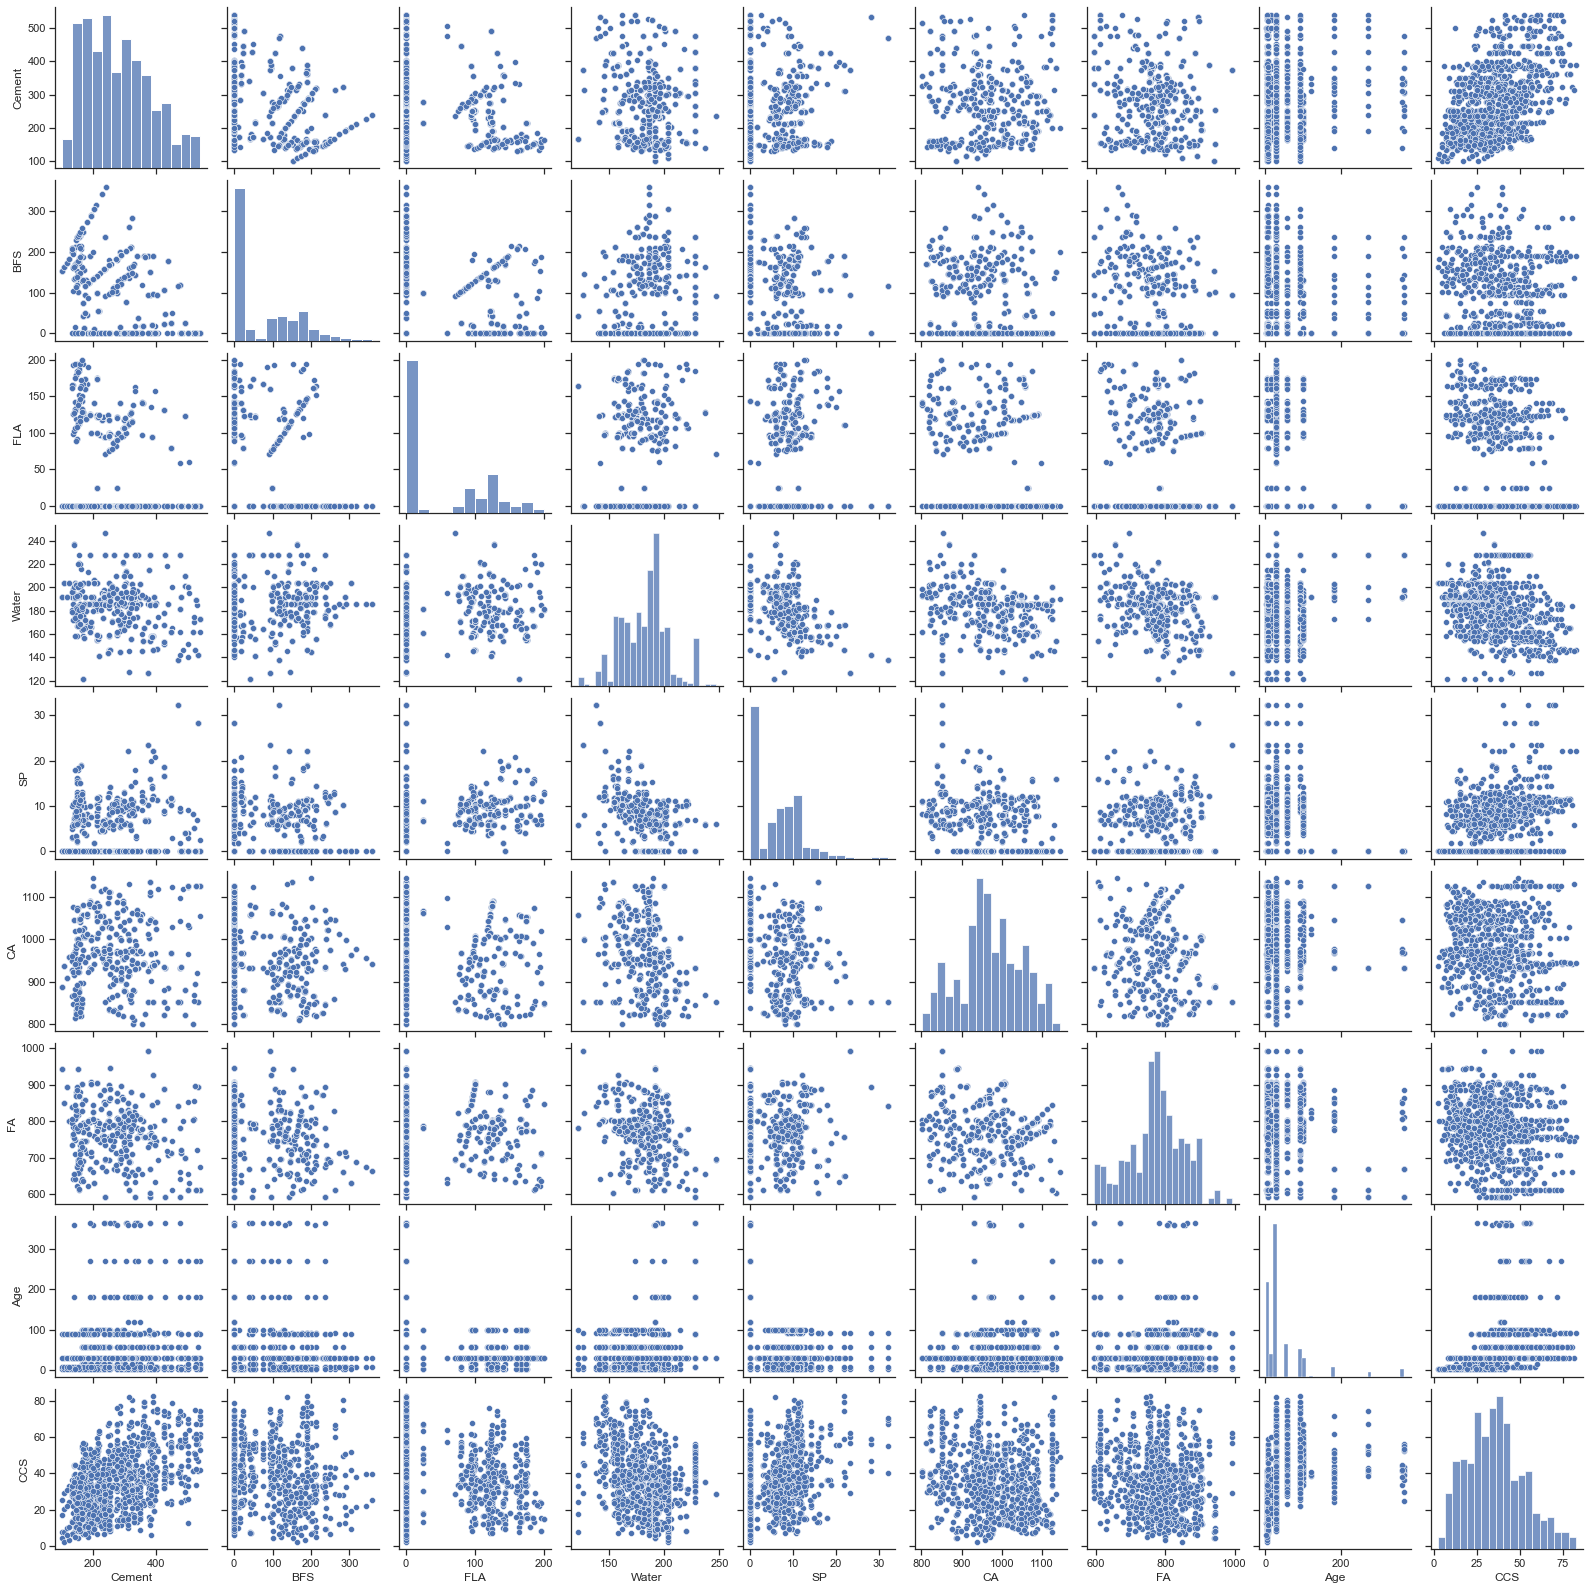

In [11]:
sns.pairplot(data=rdata)

Focusing on the last line of the graph, it contains scatter plots of the target of our concrete compressive strength (CCS) data compared to the predictors. Except foer Cement, there is no particular trend.


x(scaled) = (x-x(min)/(x(max)-x(min)))

In [4]:
scaler = MinMaxScaler()
scaler.fit(rdata)
rdataScaled= scaler.transform(rdata)
rdataScaled= pd.DataFrame(rdataScaled, columns=HDNames)

In [20]:
rdataScaled.describe()

,Cement,BFS,FLA,Water,SP,CA,FA,Age,CCS
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,0.408480,0.205808,0.271063,0.477728,0.192755,0.499574,0.450762,0.122745,0.416646
std,0.238004,0.240095,0.319866,0.170517,0.185568,0.226057,0.201095,0.173621,0.207517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205479,0.000000,0.000000,0.344511,0.000000,0.380814,0.347717,0.016484,0.266170
50%,0.389954,0.061213,0.000000,0.504990,0.197205,0.485465,0.465881,0.074176,0.399491
75%,0.566210,0.397885,0.591054,0.560878,0.315528,0.663953,0.577020,0.151099,0.543284
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

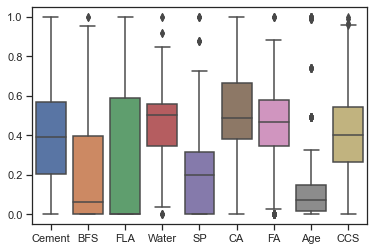

In [23]:
sns.set_style('ticks')
sns.boxplot(data=rdataScaled)

### Our data is way better at the moment, let's move to the instauration of our Network!

In [6]:
X = rdataScaled.drop('CCS', axis = 1)
y = rdataScaled['CCS']

In [9]:
X.shape, y.shape

((1029, 8), (1029,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)
X_train.shape, X_test.shape

((720, 8), (309, 8))





1.   Import the Sequential from keras.models

1.   Stack layers using the .add() method
2.   Configure the learning process using .compile() method
2.   Train the model on train dataset using .fit() method








In [17]:
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim=8, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="linear"))

In [23]:
# fully connected neural network with 4 levels (2 hidden layers)
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])



1.   adam optimizer: This is an algorithm for first order, gradient-based optimization of stochastic objective function based on adaptive estimates of lower order moments
2.   mean_squared_error loss function: Mean squared error (MSE) measures the average of the squares errors- tahat is the average squared difference between the actual estimaed values and what's to be estimated. MSE is a measure of the quality of an estimator- it's always non-negative and the coloser the values are to zero, the better


1.   accuracy metric: A metric is a function that is used to evaluate the performance of your model during training and testing





In [24]:
model.fit(X_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
23/23 [==============================] - 2s 3ms/step - loss: 0.0427 - accuracy: 0.0014
Epoch 2/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.0014
Epoch 3/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.0014
Epoch 4/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.0014
Epoch 5/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.0014
Epoch 6/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.0014
Epoch 7/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.0014
Epoch 8/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.0014
Epoch 9/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.0014
Epoch 10/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.0014

23/23 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.0014
Epoch 83/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.0014
Epoch 84/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.0014
Epoch 85/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.0014
Epoch 86/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.0014
Epoch 87/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.0014
Epoch 88/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.0014
Epoch 89/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.0014
Epoch 90/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.0014
Epoch 91/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.0014
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.0014
Epoch 163/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0014
Epoch 164/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.0014
Epoch 165/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.0014
Epoch 166/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.0014
Epoch 167/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.0014
Epoch 168/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0014
Epoch 169/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.0014
Epoch 170/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.0014
Epoch 171/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.

23/23 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 243/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 244/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0014
Epoch 245/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.0014
Epoch 246/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 247/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.0014
Epoch 248/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 249/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 250/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.0014
Epoch 251/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.

23/23 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 323/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 324/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 325/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 326/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 327/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 328/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 329/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.0014
Epoch 330/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 331/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.

23/23 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 403/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 404/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 405/1000
23/23 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 406/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 407/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 408/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 409/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 410/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 411/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.

23/23 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 483/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 484/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 485/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 486/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 487/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 488/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 489/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 490/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 491/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.

23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 563/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 564/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 565/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 566/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 567/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 568/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 569/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 570/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 571/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.

23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 643/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 644/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 645/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 646/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 647/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 648/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 649/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 650/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 651/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.

23/23 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 723/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 724/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 725/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 726/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 727/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 728/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 729/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 730/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 731/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.

23/23 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 803/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 804/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 805/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 806/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 807/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 808/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 809/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 810/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 811/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.

Epoch 882/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 883/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 884/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0014
Epoch 885/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 886/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0014
Epoch 887/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0014
Epoch 888/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 889/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 890/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0014
Epoch 891/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021

23/23 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.0014
Epoch 963/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0014
Epoch 964/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 965/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0014
Epoch 966/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0014
Epoch 967/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0014
Epoch 968/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0014
Epoch 969/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0014
Epoch 970/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0014
Epoch 971/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


Calculate the coefficient of determination (R-squared)

*   R-squared is a meausre of how well a model can predict the data, and it lies between 0 and 1; The higher the value of the coefficient of determination, the better the mode is at predicting the data.
*   R-squared (also denoted as R2) is defined as the proportion of variances in the depedent variable that is predictable from the independent variable.
To calcalate the coefficient of determination we can use the r2_score() function






In [26]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print('Coefficient of determination of Keras Model')
print(r2_score(y_test, y_pred))

Coefficient of determination of Keras Model
0.8686759069502121


Outlier distort data analysis result

---
We will use Turkey's method which will use the interquartile range (IQR) approach


---

IQR  = DataScaled.quantile(0.75) - DataScaled.quantile(0.25)


In [29]:
Q1 = rdataScaled.quantile(0.25)
Q3 = rdataScaled.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Cement    0.360731
BFS       0.397885
FLA       0.591054
Water     0.216367
SP        0.315528
CA        0.283140
FA        0.229303
Age       0.134615
CCS       0.277114
dtype: float64


In [30]:
rdataScaledOut = rdataScaled[~((rdataScaled < (Q1 - 1.5 * IQR)) | (rdataScaled > (Q3 + 1.5 * IQR))).any(axis=1)]
rdataScaledOut.shape
#1029 to 925

(925, 9)

<AxesSubplot:>

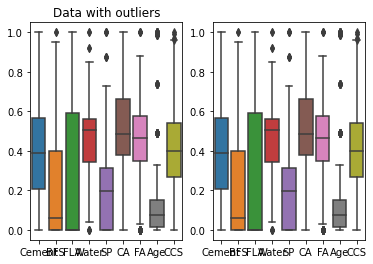

In [31]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(data = rdataScaled)
plt.title("Data with outliers")

plt.subplot(122)
sns.boxplot(data = rdataScaled) 

<AxesSubplot:>

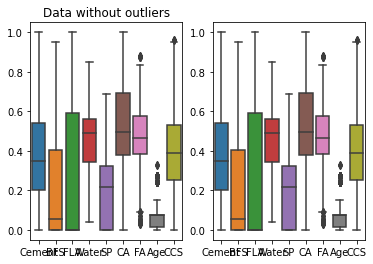

In [33]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(data = rdataScaledOut)
plt.title("Data without outliers")

plt.subplot(122)
sns.boxplot(data = rdataScaledOut) 

In [34]:
X2 = rdataScaledOut.drop('CCS', axis = 1)
y2 = rdataScaledOut['CCS']
X2.shape, y2.shape

((925, 8), (925,))

In [35]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 1, test_size = 0.3)
X_train2.shape, X_test2.shape

((647, 8), (278, 8))

In [36]:
# fully connected neural network with 4 levels (2 hidden layers)
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu')) # input layer which has 20 neurons, 8 input colums
model.add(Dense(10, activation='relu'))# second layer which has 10 neurons
model.add(Dense(10, activation='relu'))# third layers which has 10 neurons

model.add(Dense(1, activation='linear')) # output layer which has 1 neuront

In [37]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])

In [38]:
model.fit(X_train,y_train,epochs=1000, verbose=1)

Epoch 1/1000
23/23 [==============================] - 1s 2ms/step - loss: 0.2004 - accuracy: 0.0014 
Epoch 2/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.0014
Epoch 3/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.0014
Epoch 4/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.0014
Epoch 5/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.0014
Epoch 6/1000
23/23 [==============================] - ETA: 0s - loss: 0.0371 - accuracy: 0.0000e+ - 0s 2ms/step - loss: 0.0370 - accuracy: 0.0014
Epoch 7/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.0014
Epoch 8/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.0014
Epoch 9/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.0014
Epoch 10/1000
23/23 [==============================] 

23/23 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.0014
Epoch 82/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.0014
Epoch 83/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.0014
Epoch 84/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.0014
Epoch 85/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.0014
Epoch 86/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.0014
Epoch 87/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.0014
Epoch 88/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.0014
Epoch 89/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.0014
Epoch 90/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.0014
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0014
Epoch 162/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.0014
Epoch 163/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0014
Epoch 164/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0014
Epoch 165/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0014
Epoch 166/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0014
Epoch 167/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0014
Epoch 168/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0014
Epoch 169/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.0014
Epoch 170/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.

23/23 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0014
Epoch 242/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0014
Epoch 243/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0014
Epoch 244/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0014
Epoch 245/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0014
Epoch 246/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0014
Epoch 247/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0014
Epoch 248/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0014
Epoch 249/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0014
Epoch 250/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.

23/23 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0014
Epoch 322/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 323/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0014
Epoch 324/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.0014
Epoch 325/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.0014
Epoch 326/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0014
Epoch 327/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 328/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0014
Epoch 329/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0014
Epoch 330/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.

23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 402/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 403/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0014
Epoch 404/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 405/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0014
Epoch 406/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 407/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0014
Epoch 408/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0014
Epoch 409/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0014
Epoch 410/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.

23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 482/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 483/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 484/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 485/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 486/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 487/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 488/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 489/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 490/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.

23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 562/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 563/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 564/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 565/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 566/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 567/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 568/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 569/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 570/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.

23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 642/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 643/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 644/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 645/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 646/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 647/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 648/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 649/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 650/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.

23/23 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 722/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 723/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 724/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 725/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 726/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 727/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 728/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 729/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 730/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.

23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 802/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 803/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 804/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 805/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 806/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 807/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 808/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 809/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 810/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.

23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 881/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 882/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 883/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 884/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 885/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 886/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 887/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 888/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 889/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.

23/23 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0014
Epoch 960/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 961/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014 ETA: 0s - loss: 0.0023 - accuracy: 0.0014  
Epoch 962/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 963/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.0014
Epoch 964/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 965/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.0014
Epoch 966/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.0014
Epoch 967/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.0014
Epoch 968/1000
23/23 [==============================]

In [39]:
y_pred2 = model.predict(X_test2)
print('Coefficient of determination if Neural Network Model without outliers')
print(r2_score(y_test2,y_pred2))

Coefficient of determination if Neural Network Model without outliers
0.9218243192019212


Text(0.5, 1.0, 'Data with outliers')

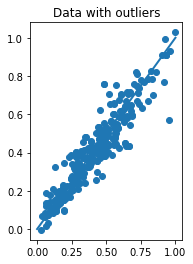

In [40]:
plt.figure(1)
plt.subplot(121)
plt.scatter(y_test,y_pred)
plt.plot([0,1],[0,1],linewidth=2)
plt.title("Data with outliers")

Text(0.5, 1.0, 'Data without outliers')

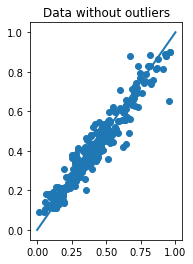

In [43]:
plt.subplot(122)
plt.scatter(y_test2,y_pred2)
plt.plot([0,1],[0,1],linewidth=2)
plt.title("Data without outliers")